### LIF:

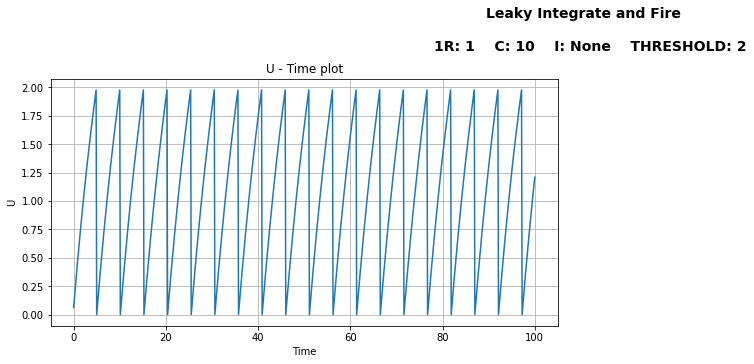

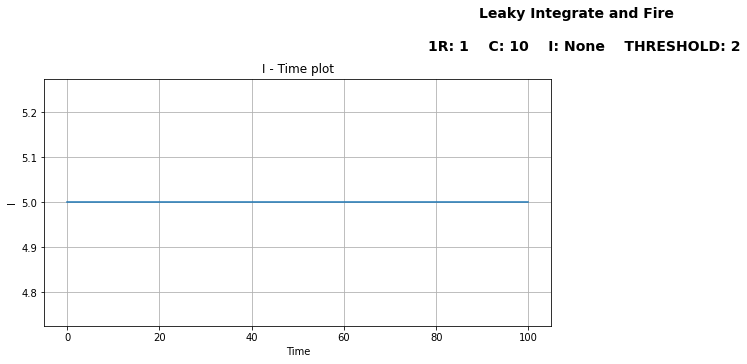

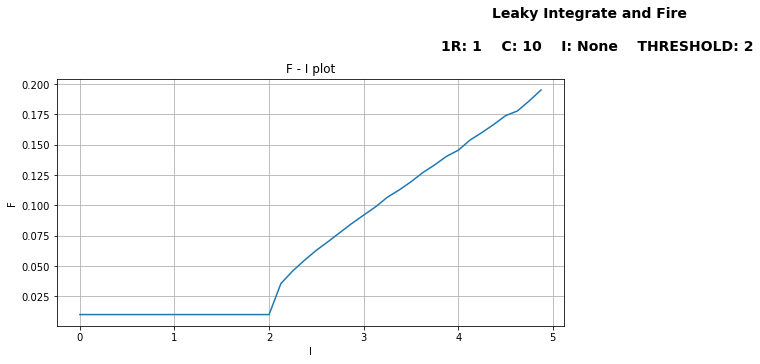

In [12]:
import numpy as np
from matplotlib.pyplot import *
import random
import math



#LIF
#                _______
# |          |   |
# |          |   |
# |          |   |_______
# |          |   |
# |          |   |
# |________  |   |
# 




# τ .(du/dt) = -(U(t) - U_rest) + R.I_const(t)
           #if u(t) => Threshold  then  Fire + Reset ( u = u reset )
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
def show_matplotlyb(sub, x, y, x_label, y_label, title):
    subplot(sub)
    plot(x, y)
    xlabel(x_label)
    ylabel(y_label)
    title(title)
    grid(True)


def i_zero_one(t, i=5, period=(20, 80)):
    s, e = period
    if s < t < e:
        return i
    return 0


def linear_current(t, c=2):
    return c * t


def current_sineWave(t, c=10):
    return c * (0.9 + math.sin(t))


def i_constant(t, i=5):
    return i


def dt_current(t, i=5, d1=(20, 30), d2=(40, 70)):
    s1, e1 = d1
    s2, e2 = d2
    if s1 < t < e1 or s2 < t < e2:
        return i
    return 0


class LIF__MODEL:
    def __init__(self, t=100, dt=0.125, current_func=i_zero_one, u_rest=0, r=1, c=10, threshold=2):
        self.time = t
        self.dt = dt
        self.i_function = current_func
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.u = []
        self.du()

    def spike_t(self, i):
        dt = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        #        ____________
        #       |            |
        # ______|            |________
        U = [self.u_rest for i in range(len(dt))]
        current_inputs = [i_constant(j, i=i) for j in dt]
        spike_t = self.time
        current_spike_time = 0
        for j in range(len(dt)):
            U[j] = U[j - 1] + ((self.r * current_inputs[j] - (U[j - 1] - self.u_rest)) / time_const) * self.dt
            if U[j] >= self.threshold:
                U[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = dt[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)

        return spike_t

    def du(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        U = [self.u_rest for i in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]

        for j in range(len(timer)):
            U[j] = U[j - 1] + ((self.r * i_input[j] - (U[j - 1] - self.u_rest)) / time_const) * self.dt
            if U[j] >= self.threshold:
                U[j] = self.u_rest

        self.u = U

    def plt(self, potentional_time=False, current_time=False, frequency_time=False, example=1):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Leaky Integrate and Fire   \n\n'+ str(example)  +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold), fontsize=14, fontweight='bold')

        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]

        if potentional_time:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)

        if current_time:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)

        if frequency_time:
            time_const = self.r * self.c
            current_x = np.arange(0, max(i_input), self.dt)
            current_y = [0 for _ in range(len(current_x))]

            for j in range(len(current_x)):
                try:
                    current_y[j] = 1 / (self.spike_t(i=current_x[j]))
                except:
                    current_y[j] = 0
            subplot(221)
            plot(current_x, current_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)
            


lif = LIF__MODEL(current_func=i_constant)
lif.plt(potentional_time=True)
lif.plt(current_time=True)
lif.plt(frequency_time=True)

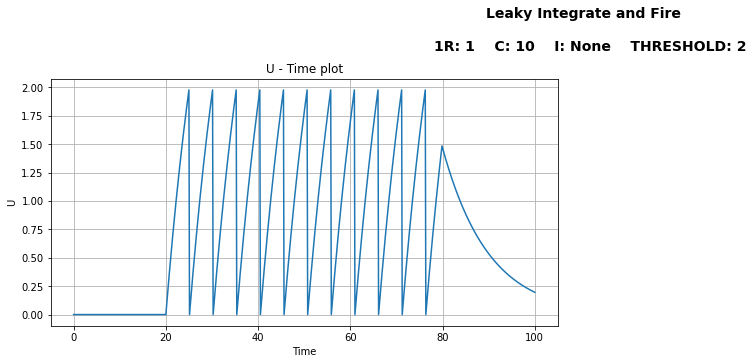

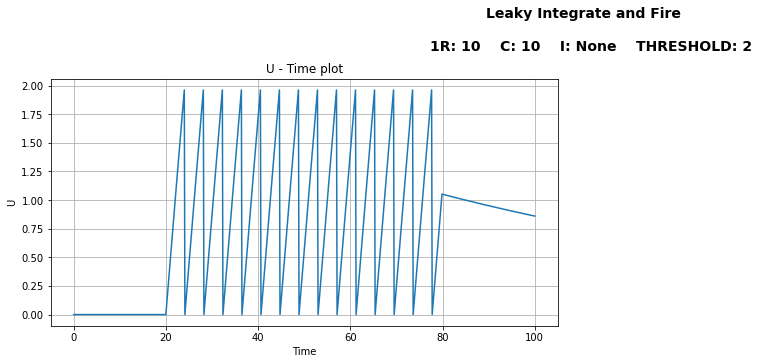

In [13]:
lif = LIF__MODEL(r=1)
lif.plt(potentional_time=True, example=1)
lif = LIF__MODEL(r=10)
lif.plt(potentional_time=True)

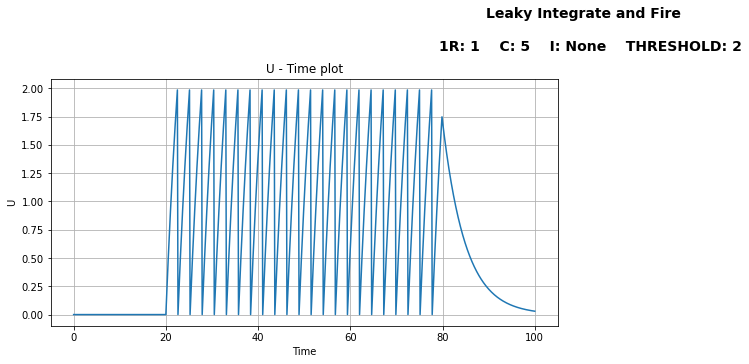

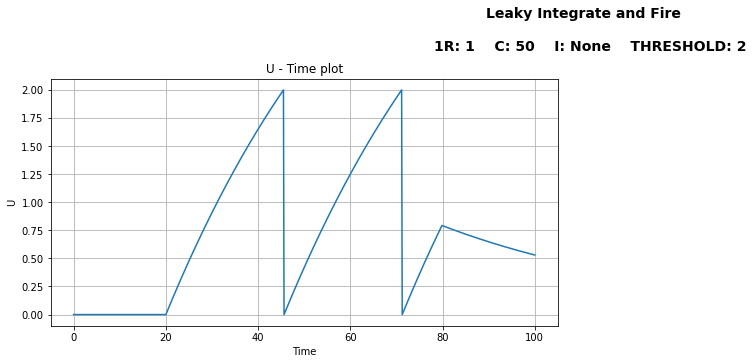

In [14]:
lif = LIF__MODEL(c=5)
lif.plt(potentional_time=True)
lif = LIF__MODEL(c=50)
lif.plt(potentional_time=True)

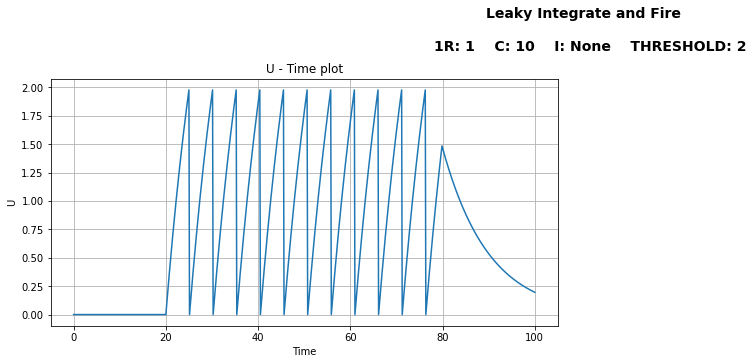

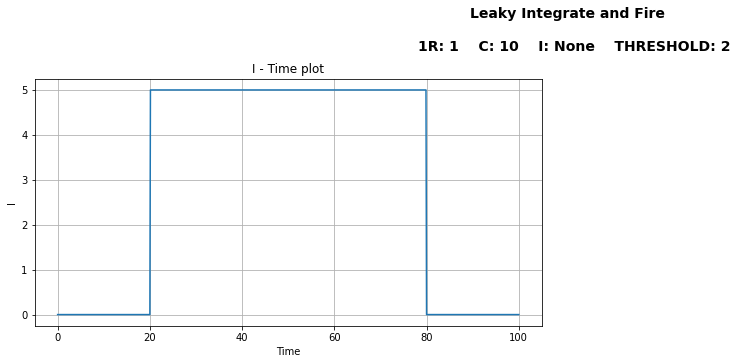

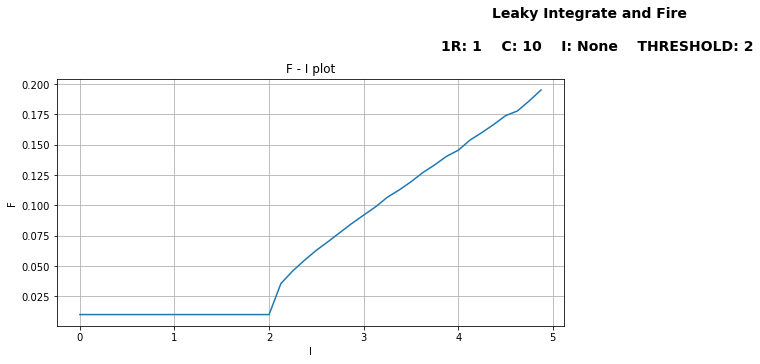

In [15]:
lif = LIF__MODEL(current_func=i_zero_one)
lif.plt(potentional_time=True)
lif.plt(current_time=True)
lif.plt(frequency_time=True)

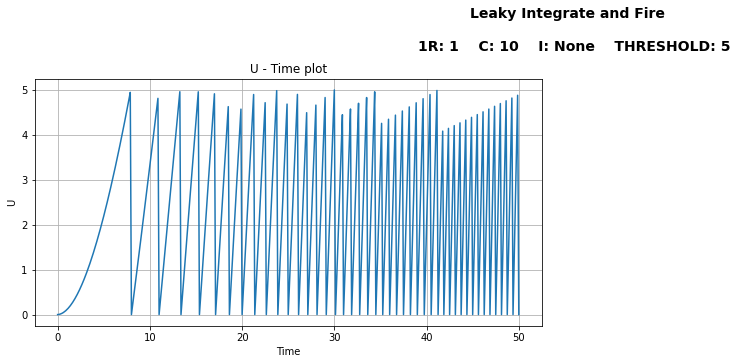

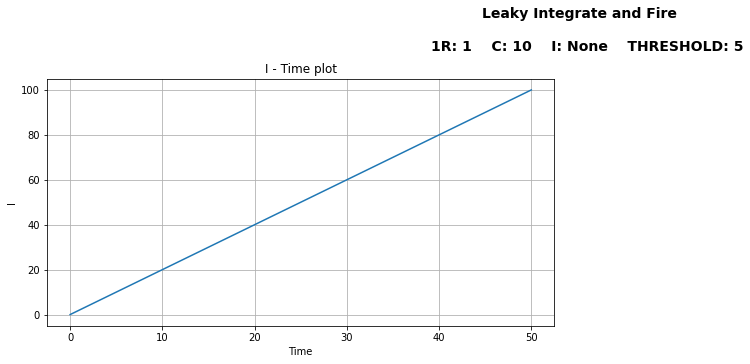

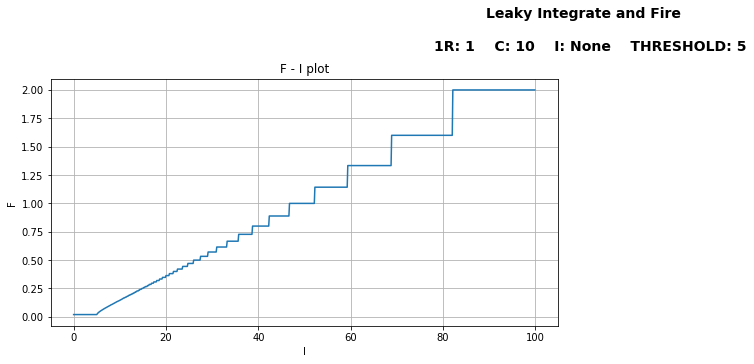

In [16]:
lif = LIF__MODEL(t=50, current_func=linear_current, threshold=5)
lif.plt(potentional_time=True)
lif.plt(current_time=True)
lif.plt(frequency_time=True)

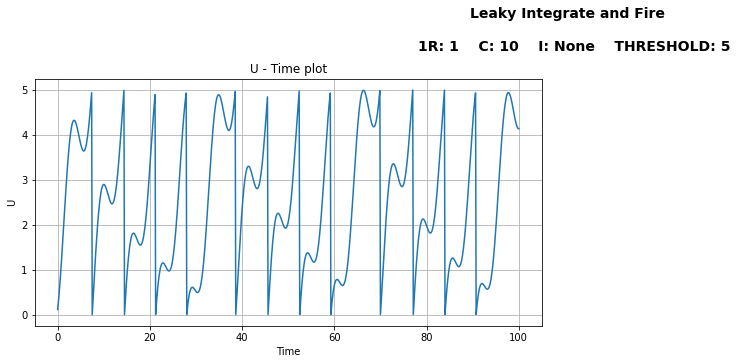

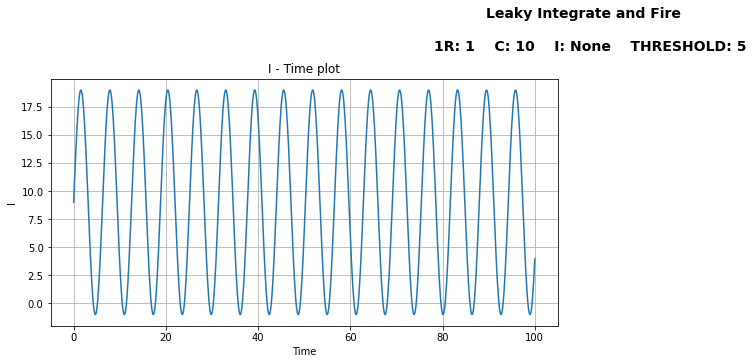

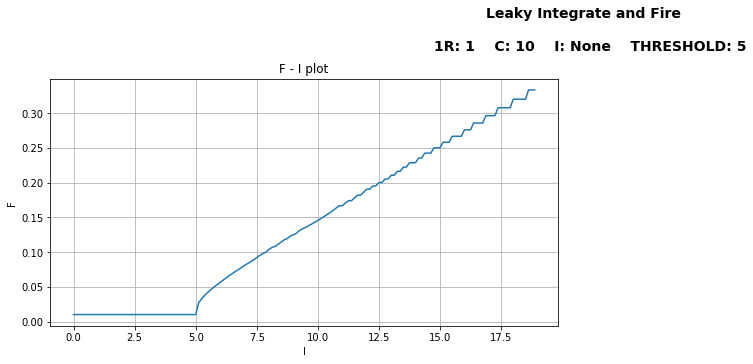

In [17]:
lif = LIF__MODEL(current_func=current_sineWave, threshold=5)
lif.plt(potentional_time=True)
lif.plt(current_time=True)
lif.plt(frequency_time=True)

### Hasan Roknabady 99222042